In [1]:
import os
os.chdir('/rds/general/user/cb1319/home/GEOM3D/Geom3D/')


In [5]:
import importlib
import os
from geom3d.dev_scripts import run_training

importlib.reload(run_training)

os.chdir('/rds/general/user/cb1319/home/GEOM3D/Geom3D/')
%run src/geom3d/dev_scripts/run_training.py --model_name 'SchNet' --num_molecules 80000 --split 'oligomer_scaffold' 


config loaded from /rds/general/user/cb1319/home/GEOM3D/Geom3D/performance_eval_test/SchNet_combined_80000
config saved at  /rds/general/user/cb1319/home/GEOM3D/Geom3D/performance_eval_test/SchNet_combined_80000
config loaded from /rds/general/user/cb1319/home/GEOM3D/Geom3D/performance_eval_test/SchNet_combined_80000
Model loaded:  SchNet
oligomer_scaffold split
Dataset file found in df_total
Clustering with min_cluster_size = 750 and min_samples = 50
Clustered 82204 oligomers
Chosen cluster: 1
Length of Cluster 1: 2166
Dataset split indices saved to /rds/general/user/cb1319/home/GEOM3D/Geom3D/performance_eval_test/datasplit_80000_oligomer_scaffold_mincluster_750_minsample_50_cluster_1.npz
train_idx:  [10967, 69651, 51553, 54757, 37931, 73407, 54766, 33196, 60889, 55098, 58172, 9234, 70410, 35864, 12115, 25319, 23833, 2540, 11500, 28060, 69423, 59463, 57284, 27111, 18488, 52414, 44055, 52763, 17256, 45459, 13980, 16659, 58913, 56712, 20764, 41682, 16813, 55178, 21953, 2795, 72631, 2373

Problem at: /rds/general/user/cb1319/home/anaconda3/envs/Geom3D/lib/python3.11/site-packages/wandb/sdk/wandb_init.py 854 getcaller


CommError: Run initialization has timed out after 90.0 sec. 
Please refer to the documentation for additional information: https://docs.wandb.ai/guides/track/tracking-faq#initstarterror-error-communicating-with-wandb-process-

In [4]:
import wandb

wandb.finish()

In [3]:
import optuna
import os

os.chdir('/rds/general/user/cb1319/home/GEOM3D/Geom3D/')
optuna.delete_study(study_name="", storage="sqlite:///./hp_search/my_study.db")

In [3]:
%matplotlib inline

config loaded from /rds/general/user/cb1319/home/GEOM3D/Geom3D/performance_eval_test/SchNet_IP_80000
checkpoint used: /rds/general/user/cb1319/home/GEOM3D/Geom3D/performance_eval_test/SchNet_IP_80000/epoch=4-val_loss=0.17-other_metric=0.00-v1.ckpt
Model loaded:  SchNet
y_true tensor(6.1075)
tensor(6.1075)
oligomer_scaffold split


Calculating the average PCA score for each oligomer: 100%|██████████| 82204/82204 [00:18<00:00, 4391.58it/s]


Problematic keys: []
Number of Oligomers not converted: 0
Clustering with min_cluster_size = 750 and min_samples = 50
Length of Cluster 4: 10334
train_idx:  [70102, 77019, 76912, 7581, 24952, 16321, 15284, 64546, 49666, 53735, 70602, 33456, 73439, 33479, 55798, 19556, 64988, 78315, 72577, 15840, 9974, 41157, 21563, 5263, 20439, 10647, 61024, 69961, 10559, 22434, 68022, 73209, 34686, 63636, 74484, 33635, 44897, 20485, 18939, 36257, 52254, 44401, 40353, 70017, 67781, 53605, 35749, 48331, 29938, 34193, 51464, 20171, 47997, 78026, 25458, 64213, 7999, 33233, 39115, 5302, 17528, 14435, 55265, 42840, 78751, 27652, 7339, 44190, 43217, 4870, 3838, 66770, 14020, 70896, 25184, 57853, 13350, 13135, 13683, 33930, 23526, 5472, 53091, 2156, 10612, 27176, 3194, 42666, 29522, 21005, 44455, 30990, 7311, 46151, 50477, 45379, 67413, 46623, 44668, 56423, 70401, 8413, 4851, 5496, 68001, 73365, 6344, 12924, 50673, 63198, 43646, 21998, 33865, 26771, 5760, 10516, 30957, 16295, 69009, 65526, 43936, 39632, 59802

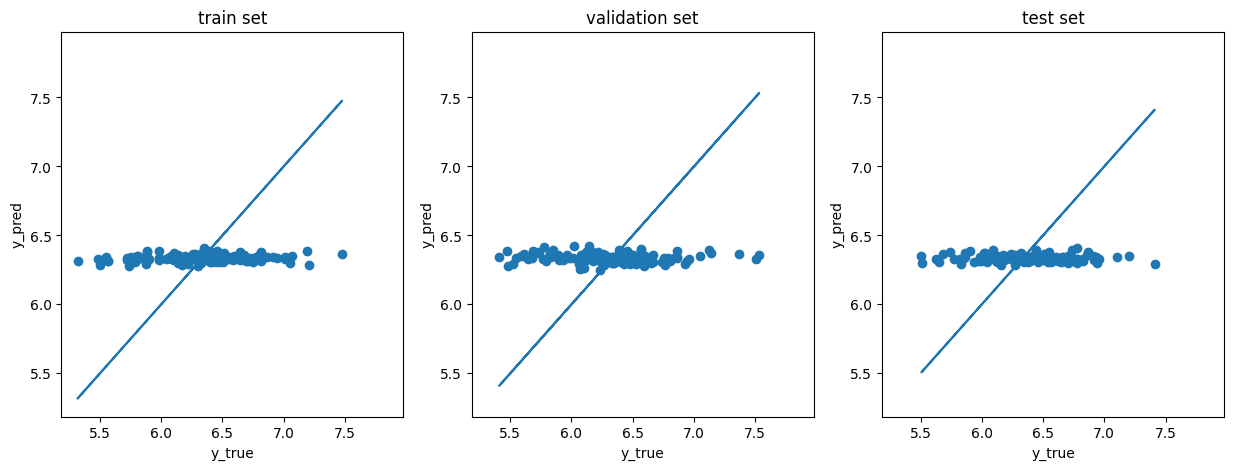

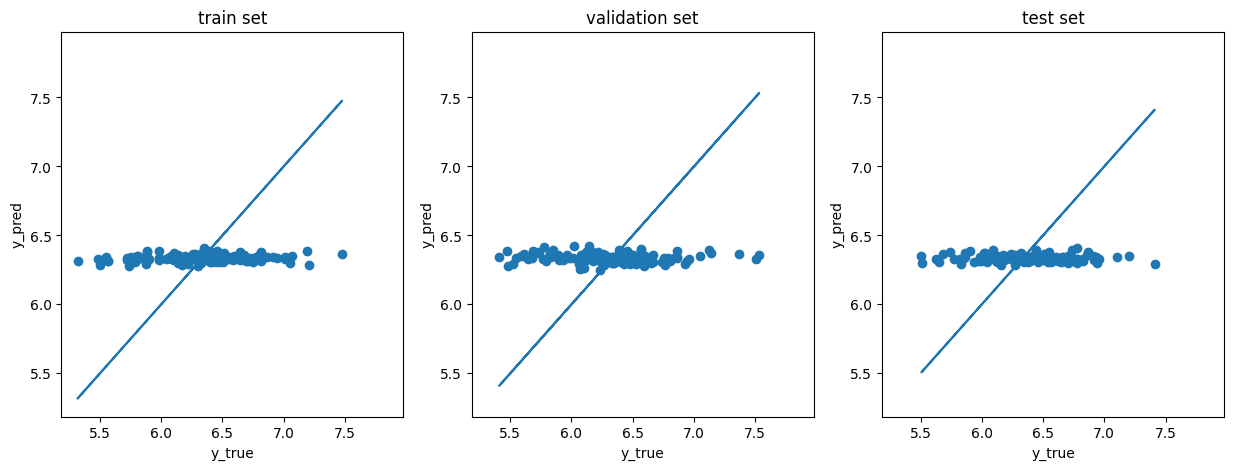

Mean Absolute Error (MAE) on test_set: 0.31643385
Root Mean Squared Error (RMSE) on test_set: 0.406899428300838


(<torch_geometric.loader.dataloader.DataLoader at 0x146298991210>,
 0.31643385,
 0.406899428300838)

<Figure size 640x480 with 0 Axes>

In [4]:
import importlib
from geom3d.inference_tests import inference_test_models

config_dir = "/rds/general/user/cb1319/home/GEOM3D/Geom3D/performance_eval_test/SchNet_IP_80000"
chkpt_path = "/rds/general/user/cb1319/home/GEOM3D/Geom3D/performance_eval_test/SchNet_IP_80000/epoch=4-val_loss=0.17-other_metric=0.00-v1.ckpt"

importlib.reload(inference_test_models)
inference_test_models.plot_training_results(chkpt_path, config_dir)

In [3]:
%run /rds/general/user/cb1319/home/GEOM3D/Geom3D/src/geom3d/utils/update_target.py

Original dataset loaded
Updating targets in dataset...
New dataset saved: /rds/general/user/cb1319/home/GEOM3D/Geom3D/training/dataset80K_radius_IP.pt
New dataset saved: /rds/general/user/cb1319/home/GEOM3D/Geom3D/training/dataset80K_radius_ES1.pt
New dataset saved: /rds/general/user/cb1319/home/GEOM3D/Geom3D/training/dataset80K_radius_fosc1.pt


In [9]:
import torch
from torch_geometric.loader import DataLoader

# Load the original dataset
original_dataset_path = "/rds/general/user/cb1319/home/GEOM3D/Geom3D/training/80Kdataset_radius.pt"
original_dataset = torch.load(original_dataset_path)

# Load the new datasets
new_dataset_paths = [
    "/rds/general/user/cb1319/home/GEOM3D/Geom3D/training/80Kdataset_radius_IP.pt",
    "/rds/general/user/cb1319/home/GEOM3D/Geom3D/training/80Kdataset_radius_ES1.pt",
    "/rds/general/user/cb1319/home/GEOM3D/Geom3D/training/80Kdataset_radius_fosc1.pt",
]

new_datasets = [torch.load(path) for path in new_dataset_paths]

# Print the first few samples of each dataset
num_samples_to_display = 3

# Original dataset
print("Original Dataset:")
for i, data in enumerate(original_dataset[:num_samples_to_display]):
    print(f"Sample {i + 1} - Target: {data.y.item()}")

# New datasets
for j, new_dataset in enumerate(new_datasets):
    print(f"\nNew Dataset {j + 1}:")
    for i, data in enumerate(new_dataset[:num_samples_to_display]):
        print(f"Sample {i + 1} - Target: {data.y.item()}")


Original Dataset:
Sample 1 - Target: -8.769000053405762
Sample 2 - Target: -8.496899604797363
Sample 3 - Target: -9.899999618530273

New Dataset 1:
Sample 1 - Target: 6.107500076293945
Sample 2 - Target: 6.152400016784668
Sample 3 - Target: 6.206399917602539

New Dataset 2:
Sample 1 - Target: 3.99399995803833
Sample 2 - Target: 3.9700000286102295
Sample 3 - Target: 3.309000015258789

New Dataset 3:
Sample 1 - Target: 0.12430000305175781
Sample 2 - Target: 0.11209999769926071
Sample 3 - Target: 0.0925000011920929


In [6]:
import os
import torch
import copy
from geom3d import train_models
from geom3d.train_models import SchNet, DimeNet, DimeNetPlusPlus, GemNet, SphereNet, SphereNetPeriodic, PaiNN, Pymodel
from geom3d.train_models import read_config, load_data, train_val_test_split, model_setup
import importlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

config_dir = "/rds/general/user/cb1319/home/GEOM3D/Geom3D/performance_eval_test/SchNet_IP_80000"
chkpt_path = "/rds/general/user/cb1319/home/GEOM3D/Geom3D/performance_eval_test/SchNet_IP_80000/epoch=4-val_loss=0.17-other_metric=0.00-v1.ckpt"

"""
Function to plot the training results
"""
import numpy as np
config = read_config(config_dir)
np.random.seed(config["seed"])
torch.cuda.manual_seed_all(config["seed"])
torch.manual_seed(config["seed"])

config["device"] = "cuda:0" if torch.cuda.is_available() else "cpu"

print('checkpoint used:', chkpt_path)

# try:
#     pymodel = Pymodel.load_from_checkpoint(chkpt_path)
#     pymodel.freeze()
# except (TypeError, KeyError):

# to get the try and except start indent here
checkpoint = torch.load(chkpt_path)

model, graph_pred_linear = model_setup(config)
print("Model loaded: ", config["model_name"])

# Pass the model and graph_pred_linear to the Pymodel constructor
pymodel = Pymodel(model, graph_pred_linear, config)

# Load the state dictionary
pymodel.load_state_dict(state_dict=checkpoint['state_dict'])

# Set the model to evaluation mode
pymodel.eval()

# end indent here
dataset = load_data(config)
np.random.seed(config["seed"])
torch.cuda.manual_seed_all(config["seed"])

print('y_true', dataset[0].y)

# removed here because these bade the code error
# pymodel_cpu = copy.deepcopy(pymodel).to('cpu')
print(dataset[0].to('cpu').y)
# print('y_pred_cpu', pymodel_cpu(dataset[0].to('cpu')))

# Move pymodel to the same device as the input data
pymodel = pymodel.to(config["device"])

# removed code here because it made the code error
# print('y_pred', pymodel(dataset[0].to(config["device"])))

train_loader, val_loader, test_loader = train_val_test_split(
    dataset, config=config, batch_size=config["batch_size"]
)

config loaded from /rds/general/user/cb1319/home/GEOM3D/Geom3D/performance_eval_test/SchNet_IP_80000
checkpoint used: /rds/general/user/cb1319/home/GEOM3D/Geom3D/performance_eval_test/SchNet_IP_80000/epoch=4-val_loss=0.17-other_metric=0.00-v1.ckpt
Model loaded:  SchNet
y_true tensor(6.1075)
tensor(6.1075)
oligomer_scaffold split


Calculating the average PCA score for each oligomer: 100%|██████████| 82204/82204 [00:18<00:00, 4380.69it/s]


Problematic keys: []
Number of Oligomers not converted: 0
Clustering with min_cluster_size = 750 and min_samples = 50
Length of Cluster 4: 10334
train_idx:  [70102, 77019, 76912, 7581, 24952, 16321, 15284, 64546, 49666, 53735, 70602, 33456, 73439, 33479, 55798, 19556, 64988, 78315, 72577, 15840, 9974, 41157, 21563, 5263, 20439, 10647, 61024, 69961, 10559, 22434, 68022, 73209, 34686, 63636, 74484, 33635, 44897, 20485, 18939, 36257, 52254, 44401, 40353, 70017, 67781, 53605, 35749, 48331, 29938, 34193, 51464, 20171, 47997, 78026, 25458, 64213, 7999, 33233, 39115, 5302, 17528, 14435, 55265, 42840, 78751, 27652, 7339, 44190, 43217, 4870, 3838, 66770, 14020, 70896, 25184, 57853, 13350, 13135, 13683, 33930, 23526, 5472, 53091, 2156, 10612, 27176, 3194, 42666, 29522, 21005, 44455, 30990, 7311, 46151, 50477, 45379, 67413, 46623, 44668, 56423, 70401, 8413, 4851, 5496, 68001, 73365, 6344, 12924, 50673, 63198, 43646, 21998, 33865, 26771, 5760, 10516, 30957, 16295, 69009, 65526, 43936, 39632, 59802

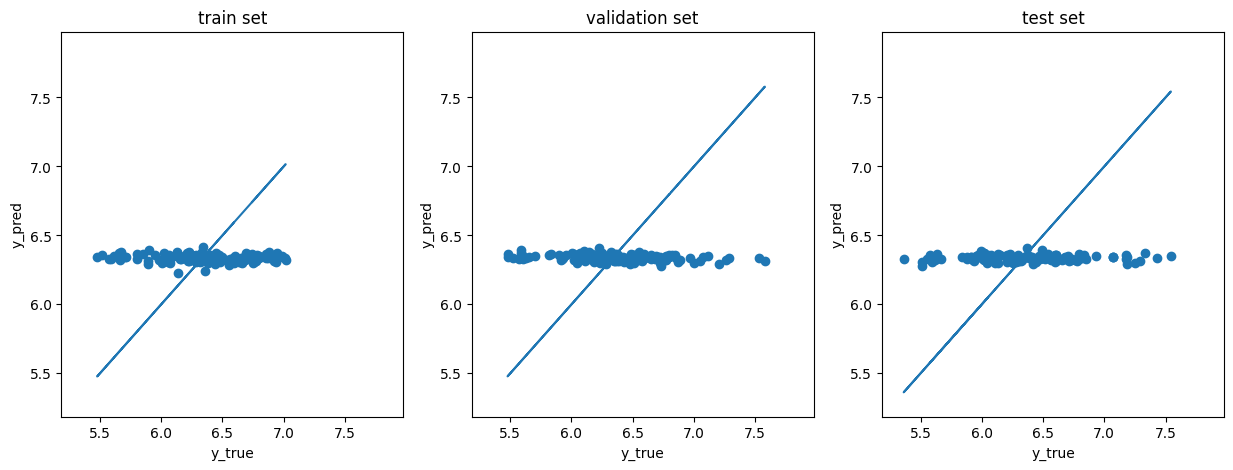

Mean Absolute Error (MAE) on test_set: 0.3179887
Root Mean Squared Error (RMSE) on test_set: 0.40672586154179413


<Figure size 640x480 with 0 Axes>

In [8]:
# Get the y values from the dataset for setting plot axes
y_values = [data.y for data in dataset]
y_min = min(y_values)
y_max = max(y_values)

fig, axis = plt.subplots(1, 3, figsize=(15, 5))
for id, loader in enumerate([train_loader, val_loader, test_loader]):
    axis[id].set_ylabel('y_pred')
    axis[id].set_xlabel('y_true')
    axis[id].set_xlim(y_min, y_max)  # Set x-axis limits based on min and max y values
    axis[id].set_ylim(y_min, y_max)  # Set y-axis limits based on min and max y values

    for x in loader:
        with torch.no_grad():
            Y_pred = pymodel(x.to(config["device"]))
        break
    axis[id].scatter(x.y.to('cpu'), Y_pred.to('cpu').detach())
    axis[id].plot(x.y.to('cpu'), x.y.to('cpu'))
    axis[id].set_title(['train set', 'validation set', 'test set'][id])
plt.show()
plt.savefig('training_results.png')

# calculate the mean absolute error
y_true = []
y_pred = []
for x in test_loader:
    with torch.no_grad():
        Y_pred = pymodel(x.to(config["device"]))
    y_true.append(x.y.to('cpu'))
    y_pred.append(Y_pred.to('cpu').detach())
y_true = torch.cat(y_true)
y_pred = torch.cat(y_pred)
mae = mean_absolute_error(y_true, y_pred)
print('Mean Absolute Error (MAE) on test_set:', mae)

# calculate the root mean squared error
from math import sqrt
rmse = sqrt(mean_squared_error(y_true, y_pred))
print('Root Mean Squared Error (RMSE) on test_set:', rmse)

In [11]:
import os

# Specify the directory path
directory_path = '/rds/general/user/cb1319/home/HPC_bash_scripts/'

# Create the directory if it doesn't exist
os.makedirs(directory_path, exist_ok=True)

# Specify the script content
script = "#!/bin/bash \n"+\
    "#PBS -l walltime=70:00:00 \n"+\
    "#PBS -l select=1:ncpus=4:mem=48gb:ngpus=1:gpu_type=RTX6000 \n"+\
    "#PBS -N training_PaiNN_80K_150epochs \n"+\
    " \n"+\
    "cd /rds/general/user/cb1319/home/Geom3D/Geom3D/ \n"+\
    "module load anaconda3/personal \n"+ \
    "module load tools/prod  \n"+ \
    "module load Python/3.10.8-GCCcore-12.2.0  \n"+ \
    "source activate Geom3D     \n"+\
    "python3 /rds/general/user/cb1319/home/GEOM3D/Geom3D/src/geom3d/train_models.py --config_dir /rds/general/user/cb1319/home/GEOM3D/Geom3D/training/PaiNN_target_80K_TEST_5e4lr/ \n"

# Save the script to a file
file_path = os.path.join(directory_path, 'training_PaiNN_80K_150epochs.sh')
with open(file_path, 'wb') as f:
    f.write( bytes(script, 'utf-8') )

print(f"Script saved to: {file_path}")

!qsub -e ./cache -o ./cache /rds/general/user/cb1319/home/HPC_bash_scripts/training_training_PaiNN_80K_150epochs.sh
!qstat

Script saved to: /rds/general/user/cb1319/home/HPC_bash_scripts/training_PaiNN_80K_150epochs.sh
/bin/bash: which: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `which'
/bin/bash: module: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `module'
/bin/bash: scl: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `scl'
/bin/bash: ml: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `ml'
/bin/sh: which: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `which'
/bin/sh: ml: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `ml'
/bin/sh: scl: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `scl'
/bin/sh: module: line 1: syntax error: unexpected end of file
/bin/sh: error imp

In [4]:
os.chdir('/rds/general/user/cb1319/home/Geom3D/Geom3D/')

script="#!/bin/bash \n"+\
    "#PBS -l walltime=70:00:00 \n"+\
    "#PBS -l select=1:ncpus=4:mem=48gb:ngpus=1:gpu_type=RTX6000 \n"+\
    " \n"+\
    "cd /rds/general/user/cb1319/home/Geom3D/Geom3D/ \n"+\
    "module load anaconda3/personal \n"+ \
    "module load tools/prod  \n"+ \
    "module load Python/3.10.8-GCCcore-12.2.0  \n"+ \
    "source activate Geom3D     \n"+\
    "python3 /rds/general/user/cb1319/home/GEOM3D/Geom3D/src/geom3d/train_models.py --config_dir /rds/general/user/cb1319/home/GEOM3D/Geom3D/training/PaiNN_target_80K_TEST_5e4lr/ \n"
print(script) 
# create the bash script

with open(f'HPC_bash_script/training_PaiNN_80K_150epochs.sh', 'wb') as f:
    f.write( bytes(script, 'utf-8'))  

# !qsub -e ./cache -o ./cache HPC_bash_script/training_training_PaiNN_80K_150epochs.sh

#!/bin/bash 
#PBS -l walltime=70:00:00 
#PBS -l select=1:ncpus=4:mem=48gb:ngpus=1:gpu_type=RTX6000 
 
cd /rds/general/user/cb1319/home/Geom3D/Geom3D/ 
module load anaconda3/personal 
module load tools/prod  
module load Python/3.10.8-GCCcore-12.2.0  
source activate Geom3D     
python3 /rds/general/user/cb1319/home/GEOM3D/Geom3D/src/geom3d/train_models.py --config_dir /rds/general/user/cb1319/home/GEOM3D/Geom3D/training/PaiNN_target_80K_TEST_5e4lr/ 



FileNotFoundError: [Errno 2] No such file or directory: 'HPC_bash_script/training_PaiNN_80K_150epochs.sh'